In [ ]:
# Calculating probabilites is fun, but sometimes the solution may not be obvious, plus it is always sensible
# to verify our solutions by running experiments.
# Monte Carlo simlations are a great way to repeatedly and randomly run experiments and
# predict the probabilities of different outcomes. 

# Monty Hall Problem in a nutshell - 
#There are 3 doors, with one door having a car behind it, while the other 2 doors have a goat behind them.
# So there is 1 in 3 chance of winning the car.
# To win the car, the player picks a door, say 1.
# The game host then opens one of the other doors, say 3, to reveal a goat and
# offers to let the player switch from door 1 to door 2.

# Since a door has been opened, the player has 2 choices left. Does it make sense to switch?
# Aren't the odds to win a prize 50-50 now?
# Why do people say the chances when we swtich doors are 2 in 3?
# What does 'probability is locked' when we make the choice even mean?

# More information in the last cell

In [1]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns

In [2]:
# define a function which calculates if sticking with the current door wins or if swithching the door wins.

def choose_door():
    
    #3 doors: 1,2 and 3
    doors = [1,2,3]
    
    # randomly place a prize behind a door
    door_prize = random.choice(doors)
    
    # a door which a contestant selects
    door_select = random.choice(doors)
    
    # the host opens a door, which cannot be the door with the prize and the door which the contestant selected
    # to get the list of doors the host can open, remove the door with the prize and the contestant's door from
    # the original doors list
    doors_rem = doors.copy()
    doors_rem.remove(door_prize)
    # a try-except to avoid errors, in case the contestant's door is the same as the prize door, so has already been removed
    try:
        doors_rem.remove(door_select)
    except ValueError:
        pass
    
    # the door the host opens out of the remaining doors caluclated above
    door_open = random.choice(doors_rem)
    
    # if the contestant sticks with the door
    door_same = door_select
    
    # if the contestant switches his door
    door_switch = doors.copy()
    door_switch.remove(door_open)
    door_switch.remove(door_select)
    
    if door_same == door_prize:
        result = 'no_switch_wins'
    else:
        result = 'switch_wins'
    return result

In [3]:
# Number of times to run the simulation
num_simulations = 1000

In [4]:
outcomes = []
for i in range(num_simulations):
    outcomes.append(choose_door())

In [5]:
# import collections
# counter=collections.Counter(outcome)
# print(counter)
# print(type(counter))

In [7]:
outcomes_df = pd.DataFrame.from_dict(outcomes)
outcomes_df.columns = ["result"]
outcomes_df

,result
0,switch_wins
1,switch_wins
2,no_switch_wins
3,no_switch_wins
4,no_switch_wins
...,...
995,switch_wins
996,switch_wins
997,switch_wins
998,switch_wins


In [8]:
outcomes_df.result.value_counts()

switch_wins       667
no_switch_wins    333
Name: result, dtype: int64

In [9]:
# Add some new columns for easy explanation purposes
def switch_wins_flag(row):
    if row.result == 'switch_wins':
        return 1
    else:
        return 0

# add a flag column 'switch_wins' which equals 1 when switching a door wins the prize
outcomes_df = outcomes_df.assign(switch_wins = outcomes_df.apply(switch_wins_flag, axis='columns'))

# add a column 'cum_sum' which gives the cumulative sum of wins when a door is switched 
outcomes_df = outcomes_df.assign(cum_sum = outcomes_df.switch_wins.cumsum())

#add a column 'win_perc' which gives the cumulative win percentage when a door is switched 
outcomes_df = outcomes_df.assign(win_perc = (outcomes_df.cum_sum*100)/(outcomes_df.index+1))
outcomes_df

,result,switch_wins,cum_sum,win_perc
0,switch_wins,1,1,100.000000
1,switch_wins,1,2,100.000000
2,no_switch_wins,0,2,66.666667
3,no_switch_wins,0,2,50.000000
4,no_switch_wins,0,2,40.000000
...,...,...,...,...
995,switch_wins,1,663,66.566265
996,switch_wins,1,664,66.599799
997,switch_wins,1,665,66.633267
998,switch_wins,1,666,66.666667


In [10]:
# sns.set_style("whitegrid")
# plt.figure(figsize=(15,5))
# plt.plot(outcomes_df.index+1, (outcomes_df.switch_wins.cumsum()/(outcomes_df.index+1)))

Text(0, 0.5, 'Win %')

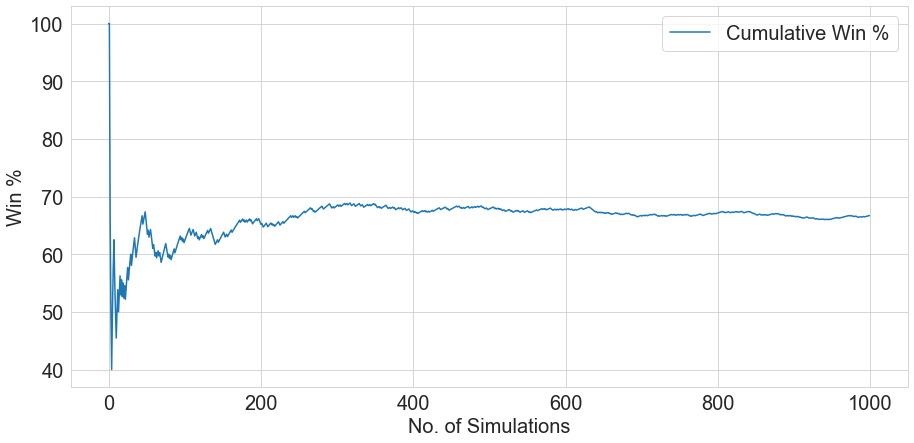

In [11]:
# Set the width and height of the figure
plt.figure(figsize=(15,7))

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 20})
sns.lineplot(data = outcomes_df["win_perc"], label="Cumulative Win %")
plt.xlabel("No. of Simulations")
plt.ylabel("Win %")

In [ ]:
# From this experiment, it looks like if we switch, the odds of winning are about 66.7%.
# This is better than the 50-50 odds.
# why?
# This is because the 'probability is locked' when the player chooses a door
# (1/3 for car behind his door, and 2/3 for car behind the other 2 doors)
# Why is it locked?
# It is locked because the decision to open a door is made by the host, who knows which door has the prize and
# will only ever open a door which doesn't have the prize.
# so swithcing now means our odds of winning are 2/3, as the host eliminated 1 door for us.